# Practical Exam Data Scientist - Data Camp
## The task is to analyze data from a fictional company and predict reviews

### Cleaning the Data

In [266]:
import pandas as pd
import numpy as np
df = pd.read_csv('electric_bike_ratings_2212.csv', dtype = {'owned': str})
df.head(10)

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
5,0,Lunna-Eyden,26-Aug,IE,47,Commuting,5/10,15.28
6,-0,Lunna-Keetra,01-Mar,Chrome,20,Leisure,3/10,12.28
7,1,Nielah-Keetra,15-Mar,Chrome,32,Commuting,7/10,15.92
8,1,Nielah-Eyden,09-Mar,Chrome,35,Commuting,4/10,19.39
9,1,Nielah-Eyden,Jul,Firefox,22,Commuting,6/10,18.38


In [267]:

#Dictionary for counting lost data
numberUnknown ={} 

#get only moonth info in the review_month column
df['review_month']= df['review_month'].apply(lambda x: x.split("-")[1] if len(x.split("-")) > 1 else x.split("-")[0] )

#Turns missing data in categorical columns to Unknown
def toUnknown(df, dict):
    for key, value in dict.items():
        filter = df[key].isin(value)
        numberUnknown[key] = len(df.loc[~filter,[key]])
        if key == 'owned':
            df.loc[~filter,[key]] = np.nan
        else :
            df.loc[~filter,[key]] = 'Unknown'



columnsToUnknown = {
    'owned': ['1','0'],
    'make_model': ['Nielah-Eyden', 'Nielah-Keetra', 'Lunna-Keetra', 'Hoang-Keetra', 'Lunna-Eyden', 'Hoang-Eyden'],
    'review_month': ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    'web_browser':  ['Chrome', 'IE', 'Firefox', 'Safari', 'Android', 'Opera'],
    'primary_use': ['Commuting', 'Leisure']
}

toUnknown(df,columnsToUnknown)


#Clean value for money column
df['value_for_money'] =df['value_for_money'].apply(lambda x: int(x.split("/")[0]))
numberUnknown['value_for_money'] = df['value_for_money'].isna().sum()

#Clean reviewer age column
df['reviewer_age'] = pd.to_numeric(df['reviewer_age'], errors='coerce', downcast='integer')
numberUnknown['reviewer_age'] = df['reviewer_age'].isna().sum()

#Count missing data Overall_rating
numberUnknown['overall_rating'] = df['overall_rating'].isna().sum()

#Fill numerical missing values
fill_values = {'reviewer_age': round(df['reviewer_age'].mean()) , 'value_for_money':0, 'overall_rating': df['overall_rating'].mean()}
df = df.fillna(value=fill_values )

#dropping NA and printing the result
df = df.dropna()
print(numberUnknown)
df.head(1000)

{'owned': 145, 'make_model': 0, 'review_month': 0, 'web_browser': 150, 'primary_use': 0, 'value_for_money': 0, 'reviewer_age': 105, 'overall_rating': 0}


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23.0,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,Unknown,24.0,Commuting,4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28.0,Commuting,5,12.76
3,1,Hoang-Keetra,Nov,IE,41.0,Leisure,5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33.0,Leisure,5,12.29
...,...,...,...,...,...,...,...,...
1107,1,Lunna-Eyden,Sep,IE,37.0,Commuting,8,15.87
1109,0,Lunna-Keetra,Aug,Firefox,39.0,Leisure,3,12.70
1110,1,Nielah-Eyden,Nov,Chrome,26.0,Commuting,6,19.28
1111,1,Nielah-Eyden,May,Chrome,33.0,Commuting,5,19.31


## Create a visualization that shows how many reviews were from owners and how many were not owners.


[[Text(0, 0, 'Owned'), Text(1, 0, 'Not Owned')]]

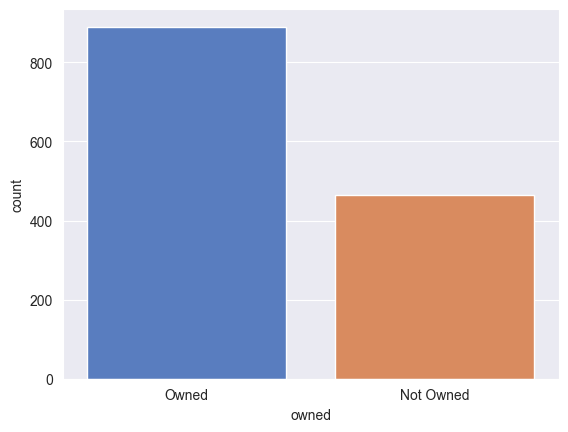

In [268]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

g1 = sns.countplot(data = df, x = 'owned', palette='muted')
g1.set(xticklabels=["Owned", "Not Owned"])



## Describe the distribution of the overall rating across the possible values. Your answer must include a visualization that shows the distribution

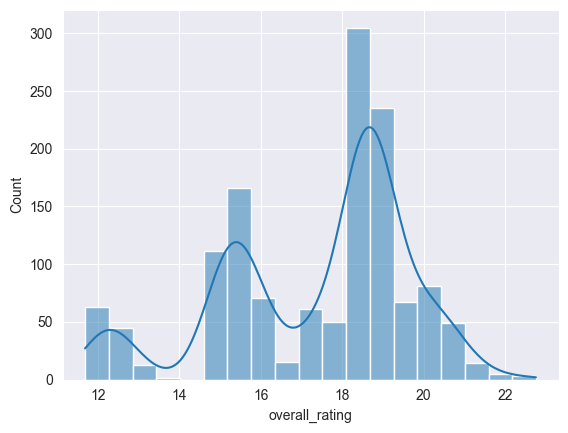

In [269]:
g2 = sns.histplot(data= df, x = 'overall_rating', kde = True)

## Describe the relationship between ownership and overall rating. Your answer must include a visualization to demonstrate the relationship.

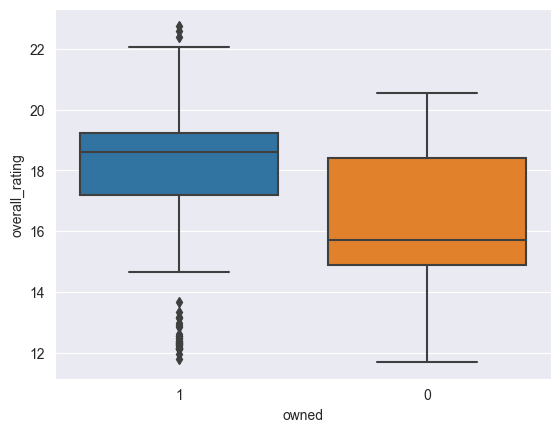

In [270]:
g3 = sns.boxplot(data= df, x = 'owned', y='overall_rating')

## The business wants to predict whether a review came from an owner or not using the data provided.


In [271]:

#First Model: Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['reviewer_age','value_for_money','overall_rating']]
y= df["owned"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Create a logistic regression object
logreg = LogisticRegression()

# Fit the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Predict the classes for the test data
logreg_y_pred = logreg.predict(X_test)



In [272]:
#Second Model: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rfc = RandomForestClassifier()

# Fit the logistic regression model on the training data
rfc.fit(X_train, y_train)

# Predict the classes for the test data
rfc_y_pred = rfc.predict(X_test)

#accuracy score 
from sklearn.metrics import accuracy_score

accuracy_logreg  = accuracy_score(logreg_y_pred, y_test)
accuracy_rfc = accuracy_score(rfc_y_pred, y_test)

print("Logistic Regression accuracy: {:.4f}".format(accuracy_logreg))
print("Random Forest Classifier accuracy: {:.4f}".format(accuracy_rfc))




Logistic Regression accuracy: 0.7712
Random Forest Classifier accuracy: 0.7454
